In [24]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import datetime
import lane_detection
import lane_following

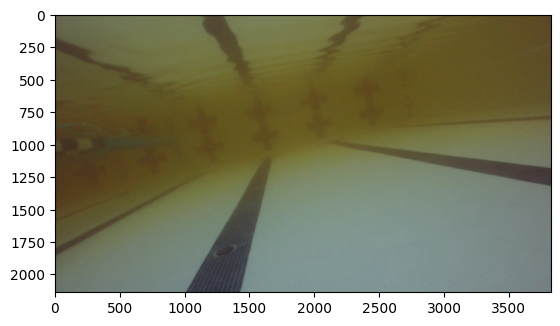

In [25]:
img = cv2.imread('lanes.png')
type(img)
img.shape
resized = (cv2.resize(img, (1912, 1069)))
height = resized.shape[0]
width = resized.shape[1]
againResized = resized[int(height/2) : height, 0 : width]
justincase = np.copy(againResized)
image = np.copy(resized)
imageLanes = np.copy(resized)
plt.imshow(img)



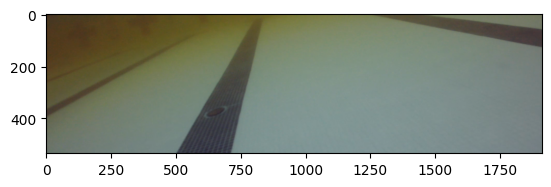

In [26]:
plt.imshow(againResized)

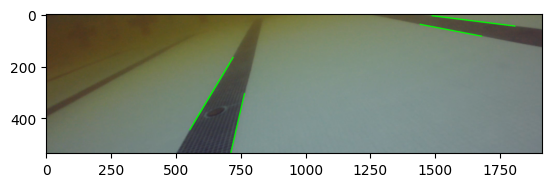

In [27]:
lines = lane_detection.detect_lines(againResized, 30, 100, 3, 229, 13)
plt.imshow(lane_detection.draw_lines(againResized, lines))

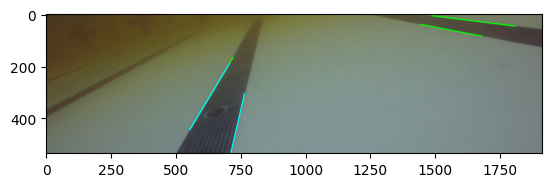

In [28]:
lanes = lane_detection.detect_lanes(againResized, lines)
plt.imshow(lane_detection.draw_lanes(againResized, lanes))

In [29]:
print(f"Possible lines: {lines}")
print(f"Possible lanes: {lanes}")
print(f"Line slopes and intercepts: {lane_detection.get_slopes_intercepts(againResized, lines)}")

Possible lines: [[1487, 6, 1808, 46], [554, 445, 707, 190], [1441, 39, 1680, 85], [570, 417, 721, 166], [712, 534, 765, 305]]
Possible lanes: [[[554, 445, 707, 190], [712, 534, 765, 305]]]
Line slopes and intercepts: ([0.12461059190031153, -1.6666666666666667, 0.19246861924686193, -1.6622516556291391, -4.320754716981132], [5732.225, 500.0, 4018.0434782608695, 499.0119521912351, 711.768558951965])


In [30]:
center = lane_following.get_lane_center(img, lanes)
action = lane_following.recommend_direction(img, center[0], center[1])
print(f"Center slope and intercept: {center}") # [-2.9955124936257014, 606.2985189581832]
print(f"Recommended action: {action}")

Center slope and intercept: [-2.4054621848739495, -60.51572052401744]
Recommended action: ['strafe left']


In [31]:
# code for video following
def videoStore(vid):
    # video.release() #Save video to disk.
    total_frames = []
    # Capture frame-by-frame
    i = 1
    while True:
        ret, frame = vid.read()
        if ret:
            resized = (cv2.resize(frame, (1912, 1069)))
            h = resized.shape[0]
            w = resized.shape[1]
            againResized = resized[int(h/2) : h, 0 : w]
        
            lines = lane_detection.detect_lines(againResized, 30, 100, 3, 229, 13)
            if lines is not None:
                lanes = lane_detection.detect_lanes(againResized, lines)
            else:
                lanes = []
            frame = lane_detection.draw_lanes(againResized, lanes)
            total_frames.append(frame)
            # output_video.write(frame)
        i+=1
        if i >= 100: break

    return total_frames

In [32]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
total_frames = videoStore(vid)
fps = int(vid.get(cv2.CAP_PROP_FPS))
width = int(total_frames[0].shape[1])
height = int(total_frames[0].shape[0])
output_file = 'output_videoo.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))
for frame in total_frames: #List every file in this folder
    output_video.write(frame) #Put image into video.
output_video.release()

NameError: name 'lane_detection_Emily' is not defined